### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/medical-examination-dataset/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Basic Statistics

In [4]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis and Data Visualization


**1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [5]:
# Calculate BMI
df['BMI'] = (df['weight'] / (df['height']/100)**2).round(2)

# Function for Overweight Column
def overweight(x):
    if x > 25:
        return 1
    else:
        return 0

# Apply function to make Overweight Column
df['Overweight'] = df['BMI'].apply(overweight)

In [6]:
df['Overweight'].value_counts().to_frame().reset_index()

,Overweight,count
0,1,43546
1,0,26454


**2. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.**

In [7]:
# cholestrol function
def cholesterol(x):
    if x == 1:
        return 0
    else:
        return 1

# Apply function to modify cholesterol column
df['cholesterol'] = df['cholesterol'].apply(cholesterol)

In [8]:
# gluc function
def gluc(x):
    if x == 1:
        return 0
    else:
        return 1

# Apply function to modify gluc column
df['gluc'] = df['gluc'].apply(gluc)

**3. Categorical Plot**

In [9]:
df_cat = df.melt("cardio", var_name = 'body_measurements', value_name = 'value', value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "Overweight"])
df_cat['value'] = df_cat['value'].astype('str')
df_cat.head()

,cardio,body_measurements,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


<Figure size 1800x700 with 0 Axes>

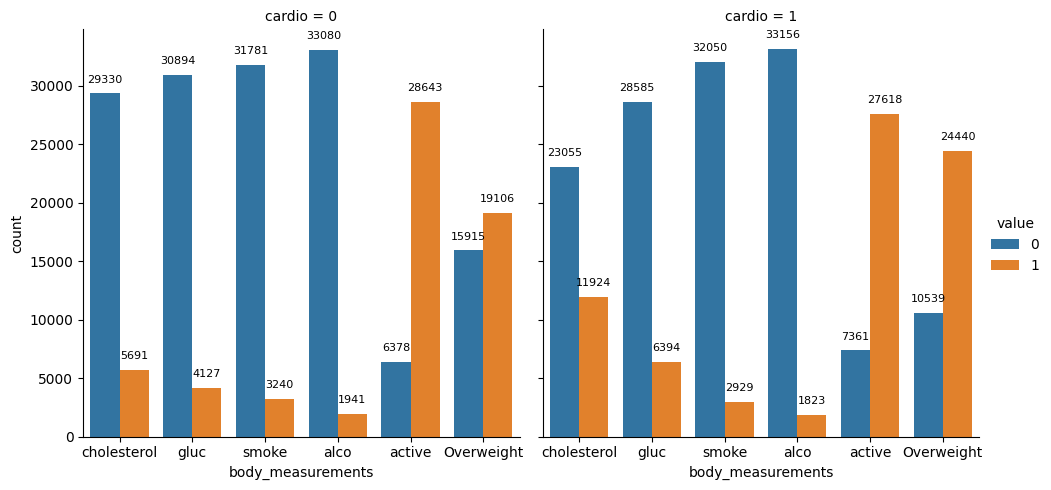

In [10]:
plt.figure(figsize = (18, 7))
graph = sns.catplot(x="body_measurements", kind="count", hue="value", col="cardio", data=df_cat)

# Loop over each subplot (Axes) in the FacetGrid
for ax in graph.axes.flat:
    for p in ax.patches:  # Loop over bars in the subplot
        ax.annotate(
            '{:.0f}'.format(p.get_height()),  # Format the height value
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Set annotation position
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', size = 8
        )

# Adjust layout
plt.show()

**4 Pivot Table**

In [11]:
df_cat = df_cat.groupby(['body_measurements', 'value', 'cardio'])['cardio'].agg(['count']).reset_index()
df_cat_pivot = pd.pivot_table(columns = ['value', 'body_measurements'], index = 'cardio', values = 'count', data = df_cat)
df_cat_pivot.index.name = 'çardio'

In [12]:
df_cat_pivot

value                      0                                                 \
body_measurements Overweight  active     alco cholesterol     gluc    smoke   
çardio                                                                        
0                    15915.0  6378.0  33080.0     29330.0  30894.0  31781.0   
1                    10539.0  7361.0  33156.0     23055.0  28585.0  32050.0   

value                      1                                               
body_measurements Overweight   active    alco cholesterol    gluc   smoke  
çardio                                                                     
0                    19106.0  28643.0  1941.0      5691.0  4127.0  3240.0  
1                    24440.0  27618.0  1823.0     11924.0  6394.0  2929.0

### 5. Data Cleaning

- **Filter Diastolic and Systolic Pressure**  
  Keep rows where the diastolic pressure (`ap_lo`) is less than or equal to the systolic pressure (`ap_hi`).

- **Filter Based on Height**  
  - Keep rows where the height is greater than or equal to the 2.5th percentile.  
  - Keep rows where the height is less than or equal to the 97.5th percentile.

- **Filter Based on Weight**  
  - Keep rows where the weight is greater than or equal to the 2.5th percentile.  
  - Keep rows where the weight is less than or equal to the 97.5th percentile.

In [13]:
# Remove incorrect data where diastolic pressure (low) is greater than diastolic pressure (high)
df = df[(df['ap_lo'] <= df['ap_hi'])]

# Remove incorrect data where height is less than 2.5th percentile
df = df[(df['height'] >= df['height'].quantile(0.025))]

# Remove incorrect data where height is more than the 97.5th percentile
df = df[(df['height'] <= df['height'].quantile(0.0975))]

# Remove incorrect data where weight is less than 2.5th percentile
df = df[(df['weight'] >= df['weight'].quantile(0.025))]

# Remove incorrect data where weight is more than the 97.5th percentile
df = df[(df['weight'] <= df['weight'].quantile(0.0975))]

**6. Correlation**

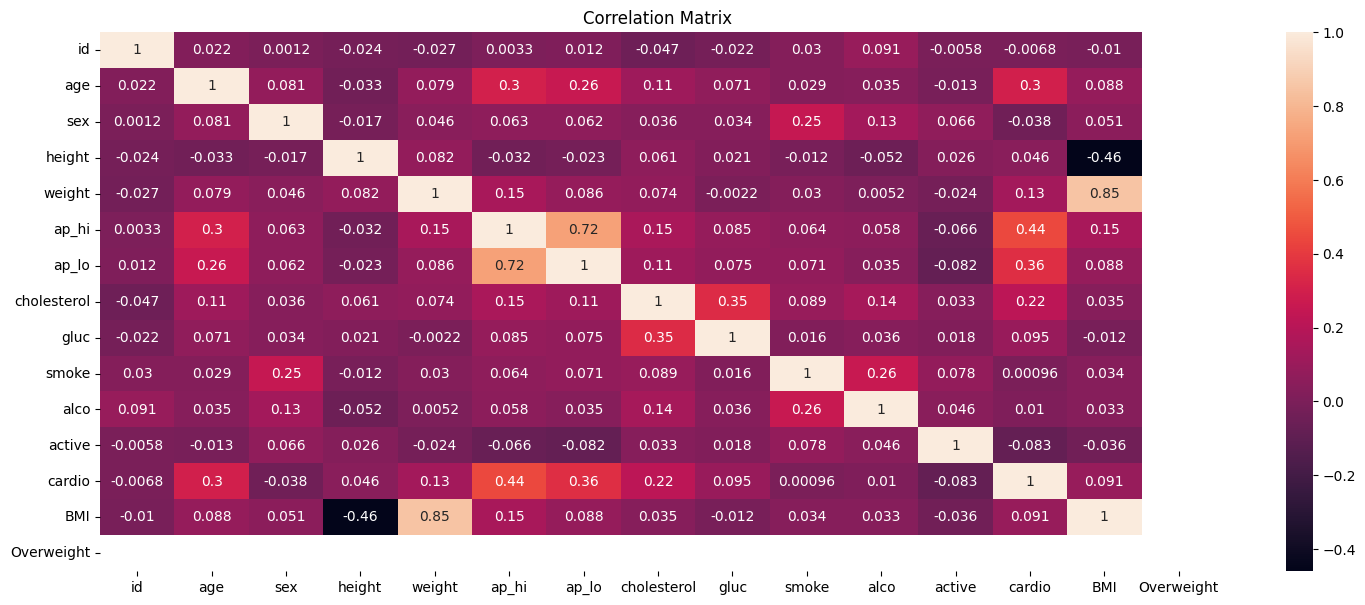

In [14]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()